# <font color=darkblue>ENGR 1330-2022-1 Exam2-Laboratory Portion  </font>

**Steiner, Jarrett**

**R11772218**

ENGR 1330 Exam 2 - Laboratory/Programming Skills

---

**Download** (right-click, save target as ...) this page as a jupyterlab notebook from: [s22-ex2-deploy.ipynb](http://54.243.252.9/engr-1330-webroot/5-ExamProblems/Exam2/Exam2/spring2022/s22-ex2-deploy.ipynb)

**If you are unable to download the file, create an empty notebook and copy paste the problems into Markdown cells and Code cells (problem-by-problem)**



---

## Problem 0 (5 pts) : <font color = 'magenta'>*Profile your computer*</font>

Execute the code cell below exactly as written.  If you get an error just continue to the remaining problems.

In [1]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

LAPTOP-5Q9HJ02L
laptop-5q9hj02l\stein_a7mrwq6
C:\Users\Stein_a7mrwq6\anaconda3\python.exe
3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)


---

## Problem 1 NUMPY (10 points) : <font color = 'magenta'> *Show me the money!* </font>

Assume that you have access to 900,000 bank accounts belonging to other people. All of these account balances start with \\$101.23 USD in them. The interest rate for all the accounts is 5%, compounded daily. [Daily compounding](https://www.eduworks.com/Documents/Workshops/EdMedia1998/class/compound.htm) generally means that the stated annual rate is applied daily (also: [Daily compounding](https://www.cuemath.com/daily-compound-interest-formula/)) $\frac{5\%}{365}=0.01369\%$ per day. 
The interest is added to the balance of each account, with the exception of the fractions of cents (anything past the third decimal place) that are truncated (dropped). 

Let's pretend we are online robbers and we want to write some code to skim the excesss interest and place it into our own account. We are going to illegally skim the fractions that get truncated (dropped) out of the other people's accounts evertime their interest is calculated, and add the truncated amounts into our own account. Our account will begin with $0 but grow by the day.

Execute the code block below to create the accounts

In [2]:
import numpy as np
# create the accounts
accounts = np.array([101.23 for i in range(900000)])

The daily interest is simply the product of the daily compounding rate and the account value

$ P_{n+1} = P_{n} + i*P_{n}$  in this problem the result $i*P_{n}$ is only reported to the penny, any smaller part of the value is skimmed into the illegal bitcoin account.

A function that performs the computations is shown below

In [3]:
# execute this code block to prototype the function
def add_interest(current_value,daily_rate):
    compounding_amount = current_value*daily_rate      # compute compounding amount.
    whole_dollar_ammount = current_value*daily_rate//1 # compute compounding amount whole dollar portion
    fractional_dollar_amount = compounding_amount - whole_dollar_ammount # compute compounding amount fractional dollar portion
    pennies = fractional_dollar_amount*100//1  # compute portion of fraction that are pennies
    skim = fractional_dollar_amount - pennies/100 
    output=(whole_dollar_ammount+pennies/100,skim) # return a tuple of interest to add, and amount to skim
    return(output) 

Implement the steps necessary to increase each of the 900,000 accounts by (5/365)% per day, truncate the accounts to the nearest penny, and add the truncated amount into a seperate account titled “bitcoin”
    
Using a repetition structure determine the abount in the bitcoin account after 1 day, 10 days and 100 days of stealing.

In [1]:
# complete the script in this block, supply indicated code to compute the steal
# generate the bitcoin account
bitcoin = 0
days = 0
# compute daily addition to each account, sweep fractional portion into bitcoin
# report bitcoin amount and days since steal begin

## Problem 2 (5 pts) : <font color = 'magenta'>*Get the data files*</font>


In [4]:
######### CODE TO AUTOMATICALLY DOWNLOAD THE DATABASE ################
import requests # import needed modules to interact with the internet
# make the connection to the remote file (actually its implementing "bash curl -O http://fqdn/path ...")
remote_url = 'http://54.243.252.9/engr-1330-webroot/8-Labs/Lab15/galton_subset.csv' # a csv file
response = requests.get(remote_url) # Gets the file contents puts into an object
output = open('galton_subset.csv', 'wb') # Prepare a destination, local
output.write(response.content) # write contents of object to named local file
output.close() # close the connection

---

## Problem 3: Dataframe read/organize (10 pts): <font color = 'magenta'>*read file into a dataframe, rename columns, show a few rows of the dataframe*</font>

Read the `galton_subset.csv` into a dataframe.  Name/rename the columns to **"Father","Mother","Child"**.  Display the first 9 rows of the dataframe.

In [23]:
# import necessary packages
import pandas as pd
# read the csv file into a dataframe
df = pd.read_csv('galton_subset.csv')

# rename son to child
_columns = ["Father", "Mother", "child"]
df.columns = _columns
df.head(9)

,Father,Mother,child
0,78.5,67.0,73.2
1,75.5,66.5,73.5
2,75.0,64.0,71.0
3,75.0,64.0,70.5
4,75.0,58.5,72.0
5,74.0,68.0,76.5
6,74.0,62.0,74.0
7,73.0,67.0,71.0
8,73.0,67.0,68.0


---

## Problem 4 Dataframe analyze/summarize (10 pts): <font color = 'magenta'>*find mean values, father, mother, child*</font>

Using the dataframe from the previous problem, find the average height of **"Father","Mother","Child"** columns (series) and the standard deviation of these columns.

On average which category is taller (father, mother, child)?

In [29]:
# query dataframe by each series

# print average height and standard deviation
print('The average height of Father group =', df['Father'].mean())
print('The average height of Mother group =', df['Mother'].mean())
print('The average height of child group =', df['child'].mean())

The average height of Father group = 69.09888268156425
The average height of Mother group = 63.99385474860336
The average height of child group = 70.45474860335199


In [30]:
# who is taller?
print('The child group has the tallest average out of the three groups of data')

The child group has the tallest average out of the three groups of data


---

## Problem 5 Dataframe Histograms (10 points) : <font color = 'magenta'> *histograms; df['...'].hist(alpha=0.5,color='...')* </font>
Using the dataframe from the Problem 4, produce a histogram of fathers and a histogram of mothers on the same plot.  Do the histograms suggest that one group is shorter than the other? 

<AxesSubplot:>

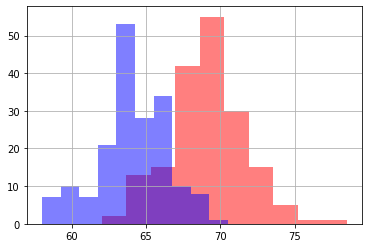

In [25]:
# build histograms df['...'].hist(alpha=0.5,color='...') of father and mother
df['Father'].hist(alpha=0.5,color='red')
df['Mother'].hist(alpha=0.5,color='blue')
# show the plot same figure

In [31]:
# who is shorter?
print('The Mothers group are shorter that the Fathers group according to the histogram')

The Mothers group are shorter that the Fathers group according to the histogram
